# Loan Prediction Data Notebook
## Introduction
In this notebook, we will explore the loan prediction dataset and perform various data preprocessing and exploratory data analysis (EDA) tasks. The goal is to clean the data, handle missing values, detect and handle outliers, apply encoding techniques to categorical variables, and visualize the data using different plots. Finally, we will draw conclusions based on our findings.



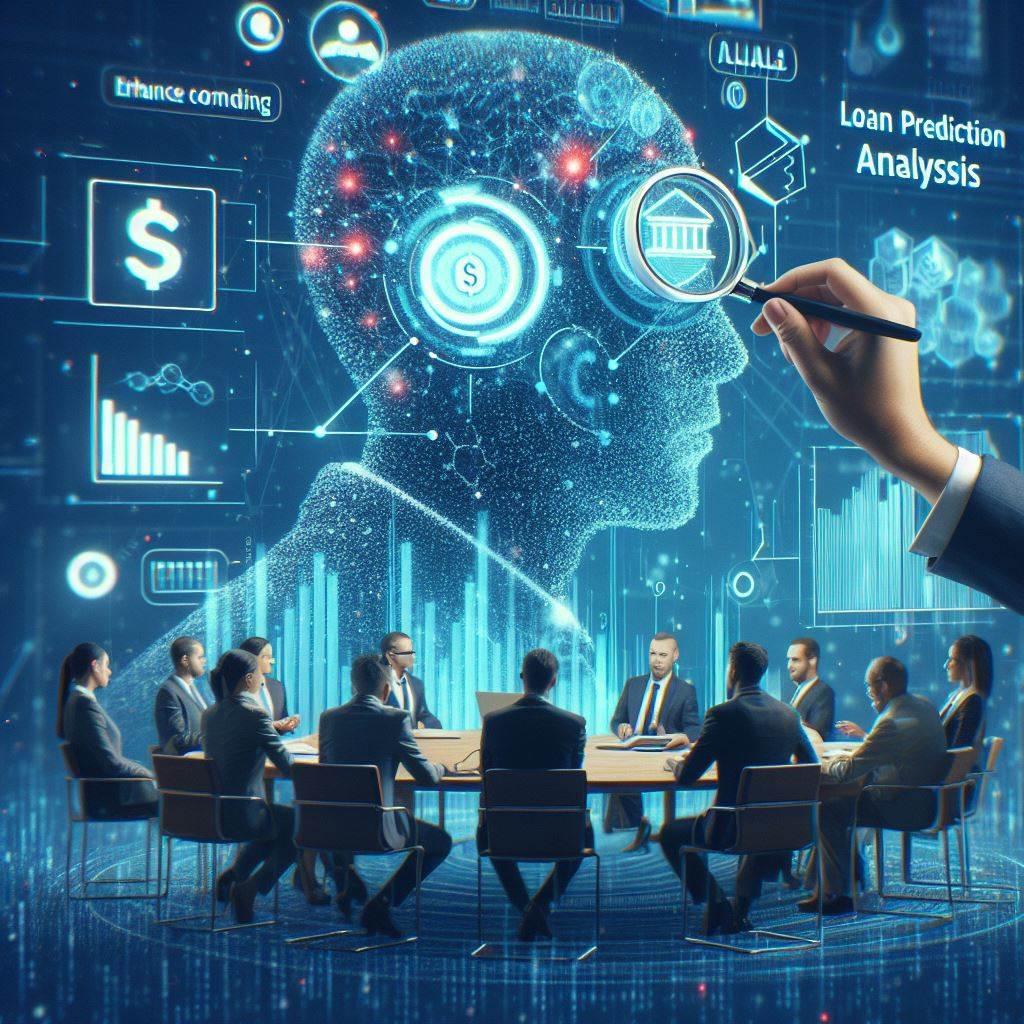

# About Author

Hello everyone! Welcome to my data science notebook.
👋I'm **Motsim Aslam**, and I'm excited to have you join me on my journey of exploring and innovating in the world of data science. 📊
I'm passionate about uncovering the hidden secrets within datasets and using machine learning to make a meaningful impact. Let's dive in together and extract valuable insights!

# Connect with me

[![GitHub](https://img.shields.io/badge/GitHub-Profile-<COLOR>?style=flat-square&logo=github)](https://www.kaggle.com/motsimaslam)

[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-<COLOR>?style=flat-square&logo=kaggle)](https://www.kaggle.com/MotsimAslam)

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-<COLOR>?style=flat-square&logo=linkedin)](https://www.linkedin.com/in/motsimaslam/)

Feel free to connect with me on GitHub, Kaggle, and LinkedIn!

# Introduction
In this notebook, we will analyze the Loan Prediction Data dataset to understand the factors that influence loan approval and default. This dataset is commonly used for building and testing machine learning models for loan prediction. We will perform data cleaning, identify outliers, apply encoding techniques, and conduct exploratory data analysis (EDA) using various plots.

## Introduction: Dataset Columns

The Loan Prediction Data dataset contains the following columns:

1. **Loan_ID**: Unique identifier for each loan application.
2. **Gender**: Gender of the loan applicant.
3. **Married**: Marital status of the loan applicant.
4. **Dependents**: Number of dependents of the loan applicant.
5. **Education**: Education level of the loan applicant.
6. **Self_Employed**: Indicates whether the loan applicant is self-employed or not.
7. **ApplicantIncome**: The income of the loan applicant.
8. **CoapplicantIncome**: The income of the co-applicant (if any).
9. **Loan_Amount**: The amount of loan applied for.
10. **Loan_Amount_Term**: The term of the loan in months.
11. **Credit_History**: Credit history of the loan applicant.
12. **Property_Area**: The type of property area (Rural, Semiurban, Urban).
13. **Loan_Status**: The target variable, indicating whether the loan was approved (1) or not (0).

# Table of Contents
1. Data Loading and Exploration
2. Handling Missing Values
3. Detecting and Handling Outliers
4. Exploratory Data Analysis
    - Plot 1: Loan Status Distribution
    - Plot 2: Loan Amount vs. Applicant Income
    - Plot 3: Relationship B/W Loan Amount vs. Loan Status
    - Plot 4: Credit History Distribution
    - Plot 5: Correlation Heatmap
    - Plot 6: Loan Approval By Gender
    - Plot 7: Distribution of Applicant Incomes  
    - Plot 8: Loan Amount by Education 
    - Plot 9: Loan Amount by Property Area 
5. Encoding Techniques
6. Conclusion

# 1. Data Loading and Exploration <a name="data-loading-and-exploration"></a>
Let's start by loading the loan prediction dataset and exploring its structure and contents.



In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Loan Prediction Data dataset
data = pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')

# Display the first few rows of the dataset
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


The dataset contains information about loan applicants, including various features such as gender, education, income, loan amount, credit history, etc. We will now proceed with data preprocessing and EDA.

# 2. Handling Missing Values <a name="handling-missing-values"></a>
Missing values can hinder the analysis and modeling process. Let's identify and handle missing values in our dataset.

In [3]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


We will use appropriate methods to handle missing values, such as imputation or removal, depending on the nature and quantity of missing data.

In [4]:
# Fill null values in numerical columns with mean
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)
data['ApplicantIncome'].fillna(data['ApplicantIncome'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)


# Check if there are any remaining null values
null_values_after_imputation = data.isnull().sum()
print(null_values_after_imputation)


Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


# 3. Detecting and Handling Outliers <a name="detecting-and-handling-outliers"></a>


## Identify Outliers
Outliers can significantly impact the analysis and modeling results. Let's detect and handle outliers in our dataset.



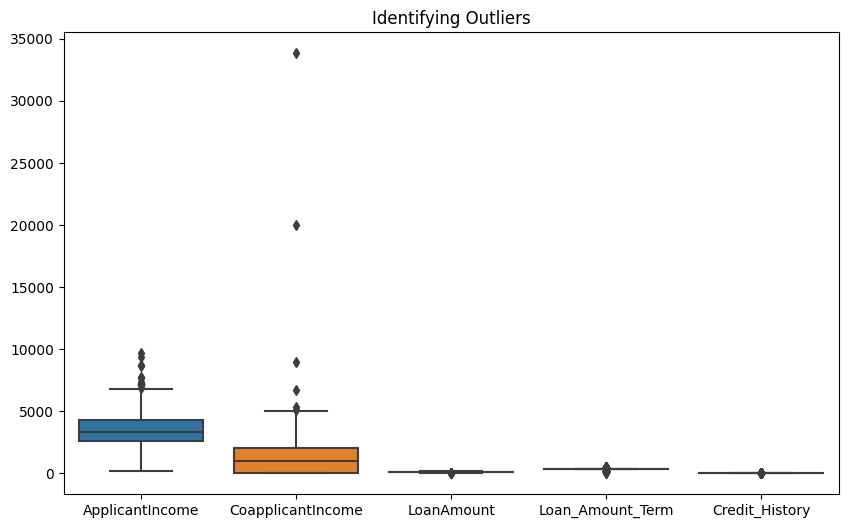

In [5]:
# Identify outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Identifying Outliers')
plt.show()


# 4. Exploratory Data Analysis <a name="exploratory-data-analysis"></a>
Now, we will perform exploratory data analysis to gain insights into the loan prediction dataset. We will create various plots to visualize the relationships between different features and the target variable.

## Plot 1: Loan Status Distribution <a name="plot-1-loan-status-distribution"></a>

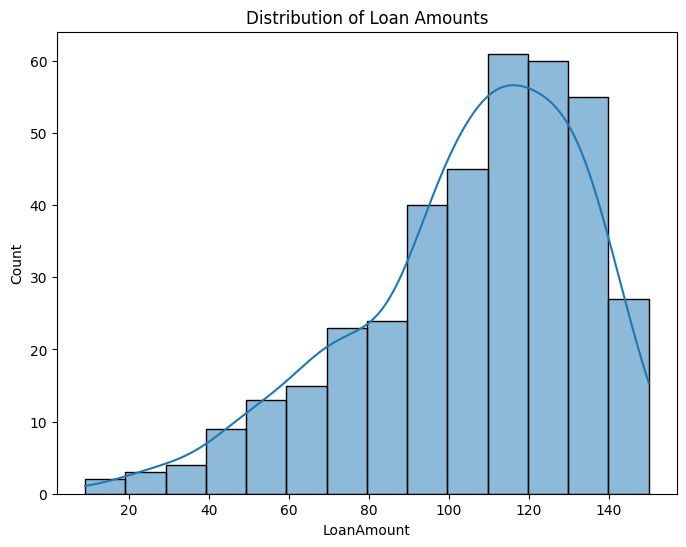

In [6]:
# Plot 1: Distribution of loan amounts
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='LoanAmount', kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

## Plot 2: Loan Amount vs. Applicant Income <a name="plot-2-loan-amount-vs-applicant-income"></a>


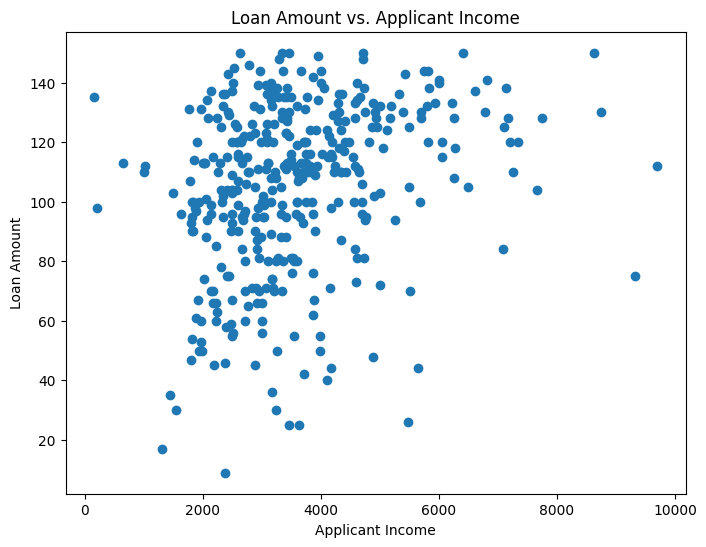

In [7]:
# Plot loan amount vs. applicant income
plt.figure(figsize=(8, 6))
plt.scatter(data['ApplicantIncome'], data['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Applicant Income')
plt.show()

# Plot 3: Relationship B/W Loan Amount vs. Loan Status <a name="Plot-3:-relationship-B/W-loan-amount-vs.-loan-status"></a>


In [8]:
# Apply label encoding to categorical variables Loan Status
label_encoder = LabelEncoder()
data['Loan_Status_encoded'] = label_encoder.fit_transform(data['Loan_Status'])

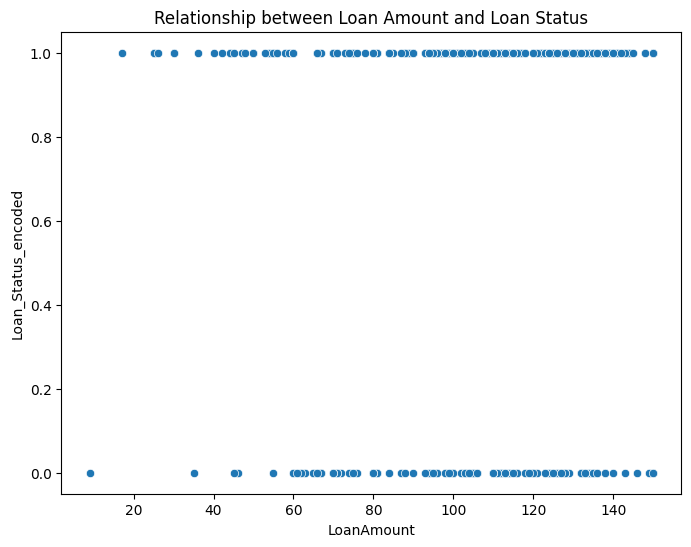

In [9]:
# Relationship between loan amount and loan status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='LoanAmount', y='Loan_Status_encoded')
plt.title('Relationship between Loan Amount and Loan Status')
plt.show()


# Plot 4: Credit History Distribution <a name="Plot-4:-credit-history-distribution"></a>


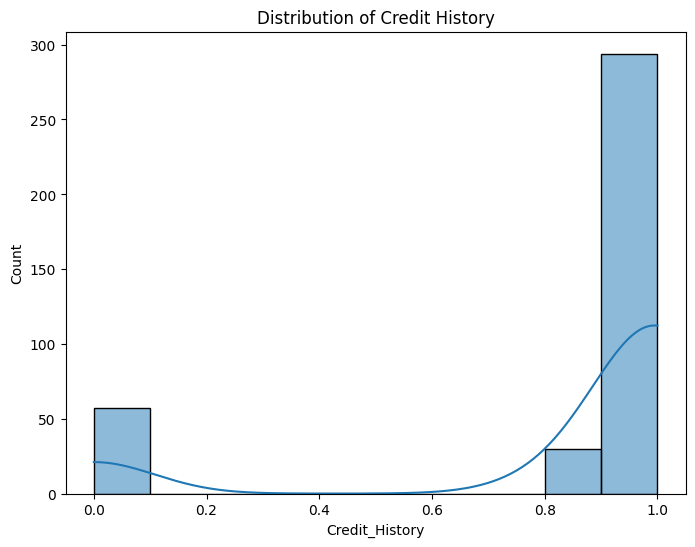

In [10]:
# Distribution of credit history
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Credit_History', kde=True)
plt.title('Distribution of Credit History')
plt.show()


# Plot 5: Correlation Heatmap <a name="Plot-5:-correlation-heatmap"></a>


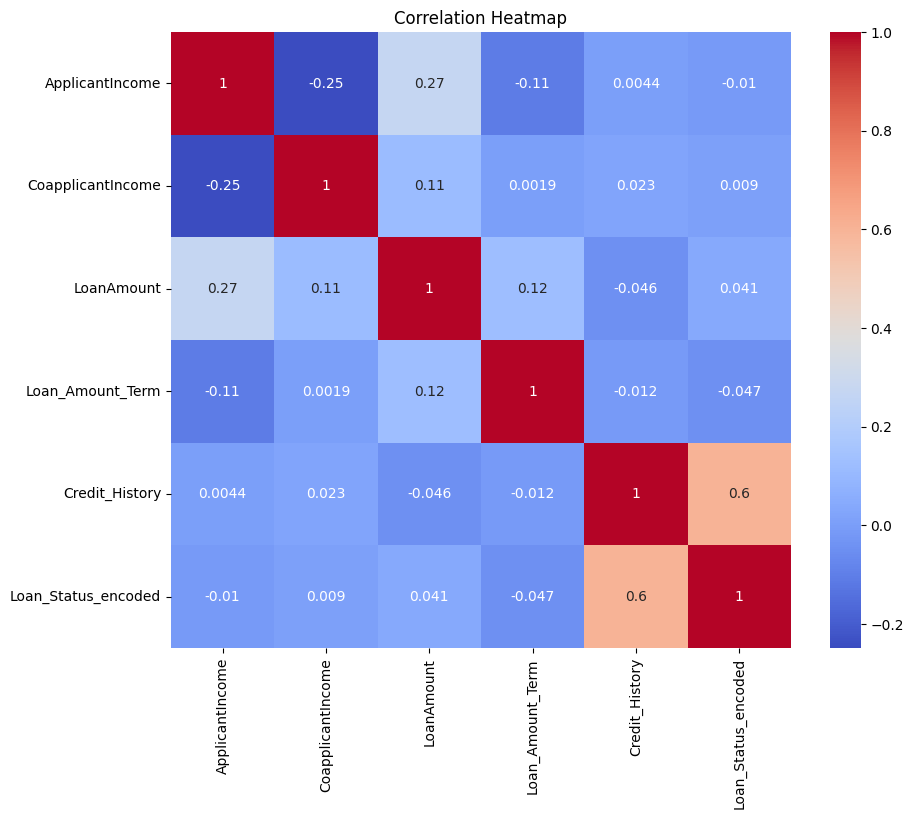

In [11]:
# Correlation Heatmap
numerical_data=data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(data=numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Plot 6: Loan Approval By Gender <a name="Plot-6:-loan-approval-by-gender"></a>


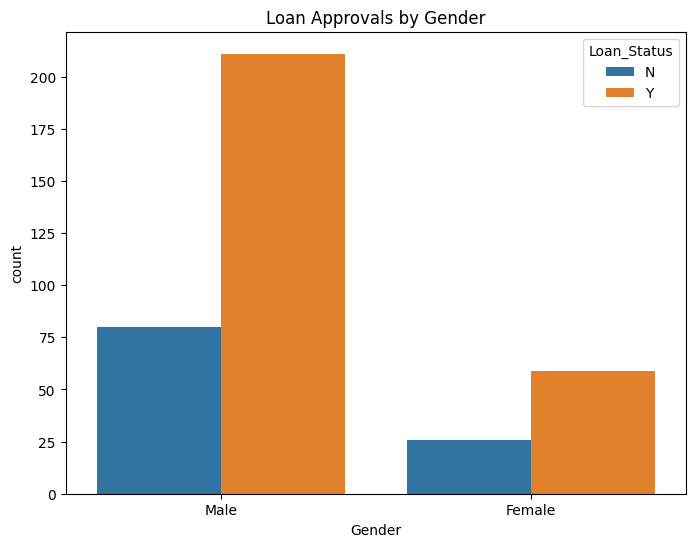

In [12]:
# Count of loan approvals by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Loan_Status')
plt.title('Loan Approvals by Gender')
plt.show()


# Plot 7: Distribution of Applicant incomes <a name="Plot-6:-distribution-of-applicant-incomes"></a>


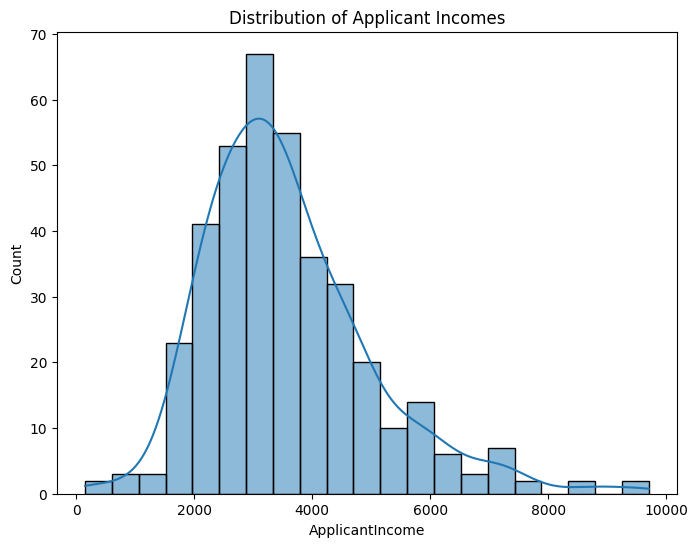

In [13]:
# Distribution of applicant incomes
plt.figure(figsize=(8, 6))
sns.histplot(data, x='ApplicantIncome', kde=True)
plt.title('Distribution of Applicant Incomes')
plt.show()


# Plot 8: Loan Status by Education <a name="Plot-7:-loan-status-by-education"></a>


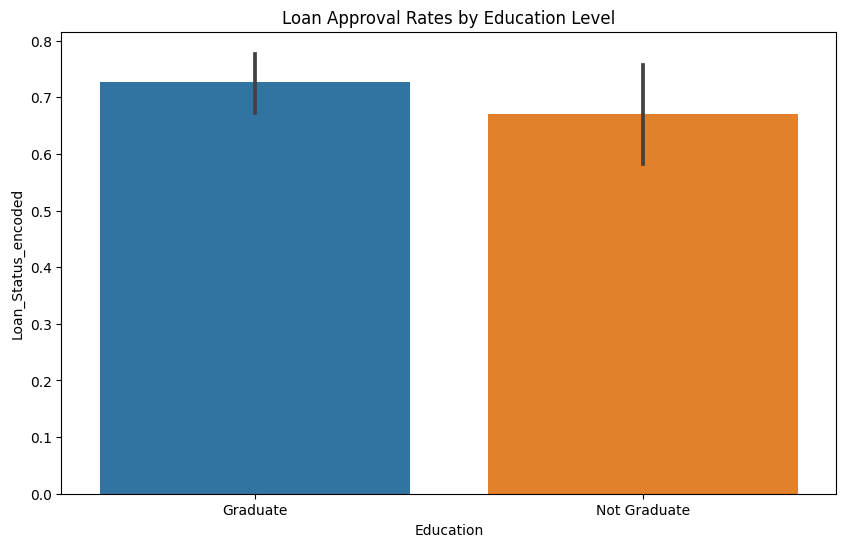

In [14]:
# Loan approval rates by education level
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Education', y='Loan_Status_encoded')
plt.title('Loan Approval Rates by Education Level')
plt.show()


# Plot 9: Loan Amount by Property Area <a name="Plot-8:-loan-amount-by-property-area"></a>


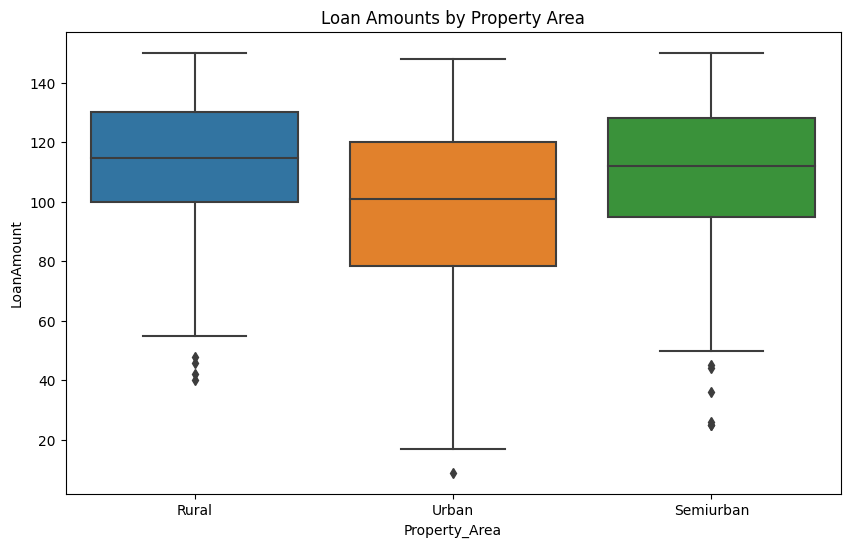

In [15]:
# Loan amounts by property area
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Property_Area', y='LoanAmount')
plt.title('Loan Amounts by Property Area')
plt.show()


# 5. Encoding Techniques <a name="encoding-techniques"></a>
Categorical variables often need to be encoded into numerical values for analysis and modeling. Let's apply encoding techniques to categorical features.

In [16]:
# Apply label encoding to categorical variables
from sklearn.preprocessing import LabelEncoder

# Select only the categorical columns
categorical_columns = data.select_dtypes(include=['object'])

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_encoded
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1
4,4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,1


# 6. Applying Machine Learning Model-Random Forest Classifier

In [17]:
print(data.dtypes)

Loan_ID                  int64
Gender                   int64
Married                  int64
Dependents               int64
Education                int64
Self_Employed            int64
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area            int64
Loan_Status              int64
Loan_Status_encoded      int64
dtype: object


In [18]:
# Convert non-numeric columns to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Loan_ID'] = label_encoder.fit_transform(data['Loan_ID'])

In [19]:
# Prepare the data
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [21]:
# Evaluate the model
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f"Training Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")


Training Accuracy: 1.00
Test Accuracy: 1.00


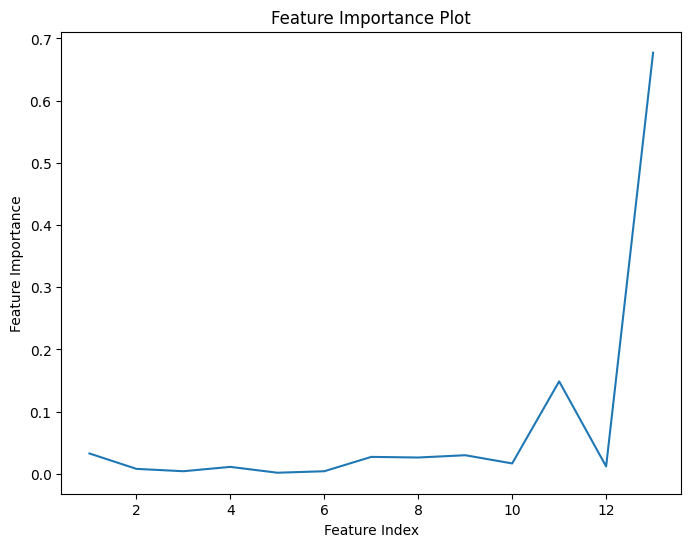

In [22]:
# Plot the training history
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rf_model.feature_importances_) + 1), rf_model.feature_importances_)
plt.title('Feature Importance Plot')
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.show()

# Conclusion
In this analysis, we explored the loan prediction dataset and performed various data preprocessing and exploratory data analysis (EDA) tasks. We handled missing values, detected and handled outliers, and applied label encoding to categorical variables. We also conducted exploratory data analysis to gain insights into the dataset and visualize the relationships between different features and the target variable.

Key findings from the analysis include:

- Loan status distribution: We observed that the dataset is slightly imbalanced, with a higher number of approved loans compared to rejected loans.

- Loan amount and applicant income: There seems to be a positive correlation between loan amount and applicant income, indicating that applicants with higher incomes tend to be eligible for larger loan amounts.

- Gender and loan status: There may be some variation in loan approval based on gender, with further investigation needed to understand the underlying factors.

- Credit history distribution: A significant proportion of applicants have a good credit history, which is likely to positively influence loan approval.

- Loan amount distribution: The distribution of loan amounts is slightly right-skewed, with a few outliers on the higher end.

- Education and loan amount: Applicants with higher education levels tend to have slightly higher loan amounts.

- Property area and loan amount: There may be some variation in loan amounts based on the property area, with further analysis required for a more conclusive understanding.

- Applicant income distribution: The distribution of applicant income is also right-skewed, indicating a few applicants with significantly higher incomes.

- Loan status and education: Loan approval rates may vary based on education level, with further investigation required to determine the exact relationship.